### Proyecto Machine Learning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

In [2]:
data_airbi_ny = pd.read_csv("/workspaces/Antonio27M-machine-learning/data/raw/internal-link.csv")
data_airbi_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

>### Observación: 
>
>Uso .info() para observar todos los datos del df.

In [3]:
df = data_airbi_ny.drop(columns=['id', 'host_id','calculated_host_listings_count'])
df.head()

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,0


>### Observación: 
>
>Uso. Drop() para eliminar columnas que no me interesan directamente, mi principal análisis va enfocando en la variable precio.

In [4]:
df.columns
#'nombre', 'nombre_del_anfitrión', 
#'grupo_de_vecindario', 'vecindario', 'latitud', 
#'longitud', 'tipo_de_habitación', 'precio', 'noches_mínimas', 
#'número_de_reseñas', 'última_reseña', 'reseñas_por_mes', 
#'número_calculado_de_anfitriones_anuncios', 'disponibilidad_365', dtype='object'


Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 48879 non-null  object 
 1   host_name            48874 non-null  object 
 2   neighbourhood_group  48895 non-null  object 
 3   neighbourhood        48895 non-null  object 
 4   latitude             48895 non-null  float64
 5   longitude            48895 non-null  float64
 6   room_type            48895 non-null  object 
 7   price                48895 non-null  int64  
 8   minimum_nights       48895 non-null  int64  
 9   number_of_reviews    48895 non-null  int64  
 10  last_review          38843 non-null  object 
 11  reviews_per_month    38843 non-null  float64
 12  availability_365     48895 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 4.8+ MB


In [6]:
df.fillna({'reviews_per_month': 0})
df.isnull().sum()

name                      16
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review            10052
reviews_per_month      10052
availability_365           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

>### Observación: 
>
>Las siguientes casillas comienzo a trabajar para conocer mis valores faltantes, verificar si hay algún duplicado y saber si sé eliminar >correctamente las columnas no deseadas.

In [8]:
df[df["price"] == 0].shape[0]
df.drop(index=df.index[df["price"] == 0], inplace=True)

In [9]:
df[df["availability_365"] == 0].shape[0]
df.drop(index=df.index[df["availability_365"] == 0], inplace=True)

In [10]:
df['room_type'].value_counts()

room_type
Entire home/apt    16532
Private room       13960
Shared room          862
Name: count, dtype: int64

In [11]:
df['number_roomtype'] = pd.factorize(df['room_type'])[0]
df['number_roomtype'].value_counts()

number_roomtype
1    16532
0    13960
2      862
Name: count, dtype: int64

In [12]:
roomtype_transformation_rules = {row['room_type']: row['number_roomtype'] for _, row in df.iterrows()}
with open('../data/processed/roomtype-transformation-rules.json', 'w') as file:
    json.dump(roomtype_transformation_rules, file)

In [13]:
df['neighbourhood_group'].value_counts()

neighbourhood_group
Manhattan        13559
Brooklyn         12253
Queens            4298
Bronx              913
Staten Island      331
Name: count, dtype: int64

In [14]:
df['number_group'] = pd.factorize(df['neighbourhood_group'])[0]
df['number_group'].value_counts()


number_group
1    13559
0    12253
2     4298
4      913
3      331
Name: count, dtype: int64

In [15]:
numbergroup_transformation_rules = {row['neighbourhood_group']: row['number_group'] for _, row in df.iterrows()}
with open('../data/processed/numbergroup-transformation-rules.json', 'w') as file:
    json.dump(numbergroup_transformation_rules, file)

>### Observación: 
>
>En las siguientes casillas procedo a eliminar valores que no tienen sentido como precio = 0, su disponibilidad = 0, ya que no está >disponible en el mercado. 
>
>También realice cambios en mis datos 'string' a numéricos para luego trabajarlos en mi modelo, realice un 'dicc' de sus nombres, >guardándolos en un archivo de texto (json) para recordar su numeración con su respectivo nombre.

In [16]:
df_region = df.drop(columns=['name','host_name','neighbourhood_group','neighbourhood','room_type','last_review'])
df_region.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31354 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   latitude           31354 non-null  float64
 1   longitude          31354 non-null  float64
 2   price              31354 non-null  int64  
 3   minimum_nights     31354 non-null  int64  
 4   number_of_reviews  31354 non-null  int64  
 5   reviews_per_month  26147 non-null  float64
 6   availability_365   31354 non-null  int64  
 7   number_roomtype    31354 non-null  int64  
 8   number_group       31354 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 2.4 MB


In [17]:
df_region

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_roomtype,number_group
0,40.64749,-73.97237,149,1,9,0.21,365,0,0
1,40.75362,-73.98377,225,1,45,0.38,355,1,1
2,40.80902,-73.94190,150,3,0,NaN,365,0,1
3,40.68514,-73.95976,89,1,270,4.64,194,1,0
5,40.74767,-73.97500,200,3,74,0.59,129,1,1
...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,9,0,0
48891,40.70184,-73.93317,40,4,0,NaN,36,0,0
48892,40.81475,-73.94867,115,10,0,NaN,27,1,1
48893,40.75751,-73.99112,55,1,0,NaN,2,2,1


In [18]:
df_region['reviews_per_month'] = df_region['reviews_per_month'].fillna(0)
df_region[df_region['reviews_per_month'] == 0]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,number_roomtype,number_group
2,40.80902,-73.94190,150,3,0,0.0,365,0,1
19,40.79685,-73.94872,190,7,0,0.0,249,1,1
36,40.68876,-73.94312,35,60,0,0.0,365,0,0
38,40.63702,-73.96327,150,1,0,0.0,365,0,0
204,40.80234,-73.95603,200,30,0,0.0,365,0,1
...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,0.0,9,0,0
48891,40.70184,-73.93317,40,4,0,0.0,36,0,0
48892,40.81475,-73.94867,115,10,0,0.0,27,1,1
48893,40.75751,-73.99112,55,1,0,0.0,2,2,1


In [19]:
df_region.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,31354.0,40.728406,0.056562,40.49979,40.688392,40.723725,40.763037,40.91306
longitude,31354.0,-73.948753,0.051400,-74.24442,-73.983280,-73.954115,-73.930152,-73.71299
price,31354.0,162.091822,254.444750,10.00000,70.000000,112.000000,189.000000,10000.00000
minimum_nights,31354.0,8.338426,23.838961,1.00000,2.000000,3.000000,5.000000,1250.00000
number_of_reviews,31354.0,31.849365,51.638559,0.00000,2.000000,10.000000,39.000000,629.00000
reviews_per_month,31354.0,1.509464,1.781202,0.00000,0.170000,0.920000,2.340000,58.50000
availability_365,31354.0,175.834439,126.195374,1.00000,55.000000,168.000000,305.000000,365.00000
number_roomtype,31354.0,0.582254,0.546103,0.00000,0.000000,1.000000,1.000000,2.00000
number_group,31354.0,0.854755,0.900613,0.00000,0.000000,1.000000,1.000000,4.00000


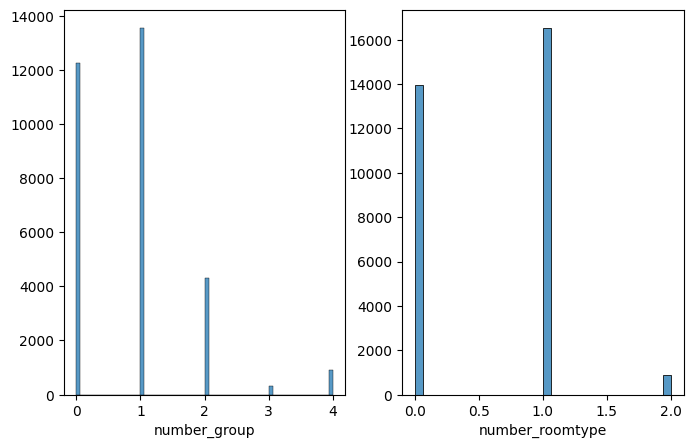

In [20]:
fig, axis = plt.subplots(1, 2, figsize=(8, 5))

sns.histplot(ax=axis[0], data=df_region, x='number_group').set(ylabel=None)
sns.histplot(ax=axis[1], data=df_region, x="number_roomtype").set(ylabel=None)

plt.show()


>### Observación: 
>
>
>Termino de eliminar columnas que no necesito para mi análisis, comienzo a gráficas mis variables categóricas para entender su >comportamiento.

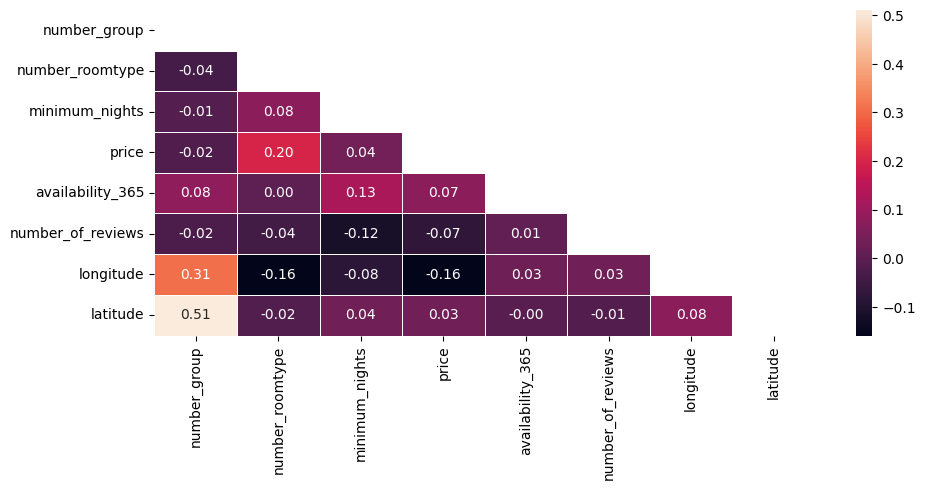

In [21]:
corr = df_region[['number_group','number_roomtype','minimum_nights','price','availability_365','number_of_reviews','longitude','latitude']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

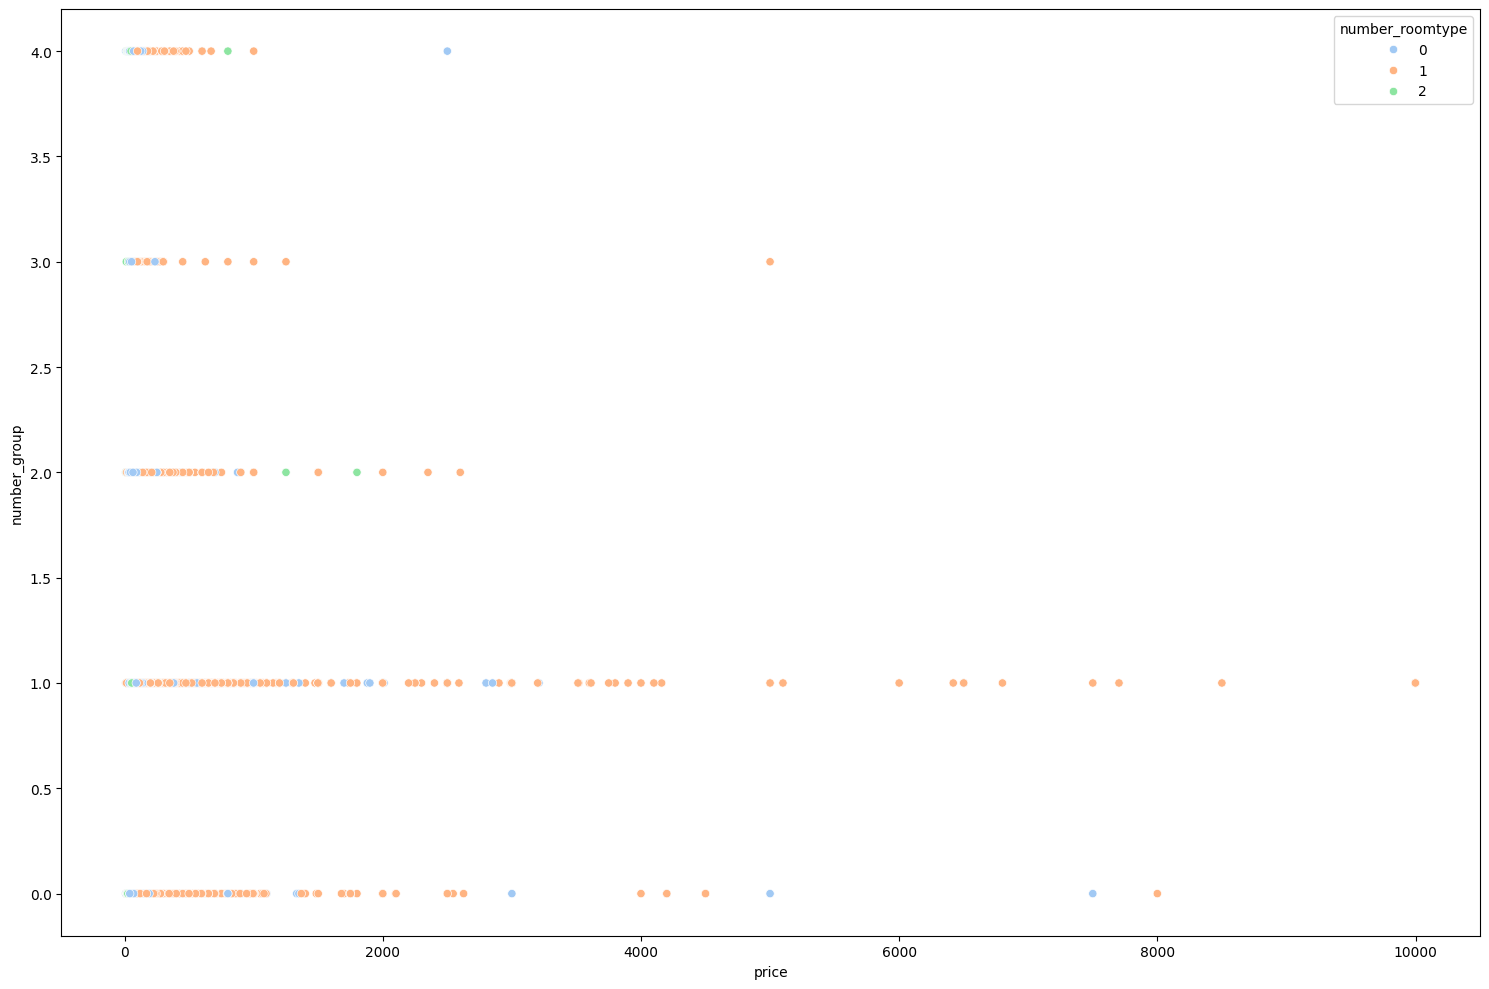

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_region, x='price', y='number_group', hue='number_roomtype', palette='pastel')
plt.tight_layout()
plt.show()

>### Observación: 
>
>
>Género un gráfico de correlación para visualizar las variables que estén cercanas entre sí, como podemos observar hay una correlación de 0.>31 en longitud y latitud, como también una pequeña correlación de nuestro target que es precio con el tipo de habitación. 
>
>Por la cual procedo a generar un gráfico para observar su comportamiento, lo que se puede observar es que hay un mayor cantidad de >apartamentos por un mayor a 2000 que otros tipos de habitación, predomina más la región Manhattan.

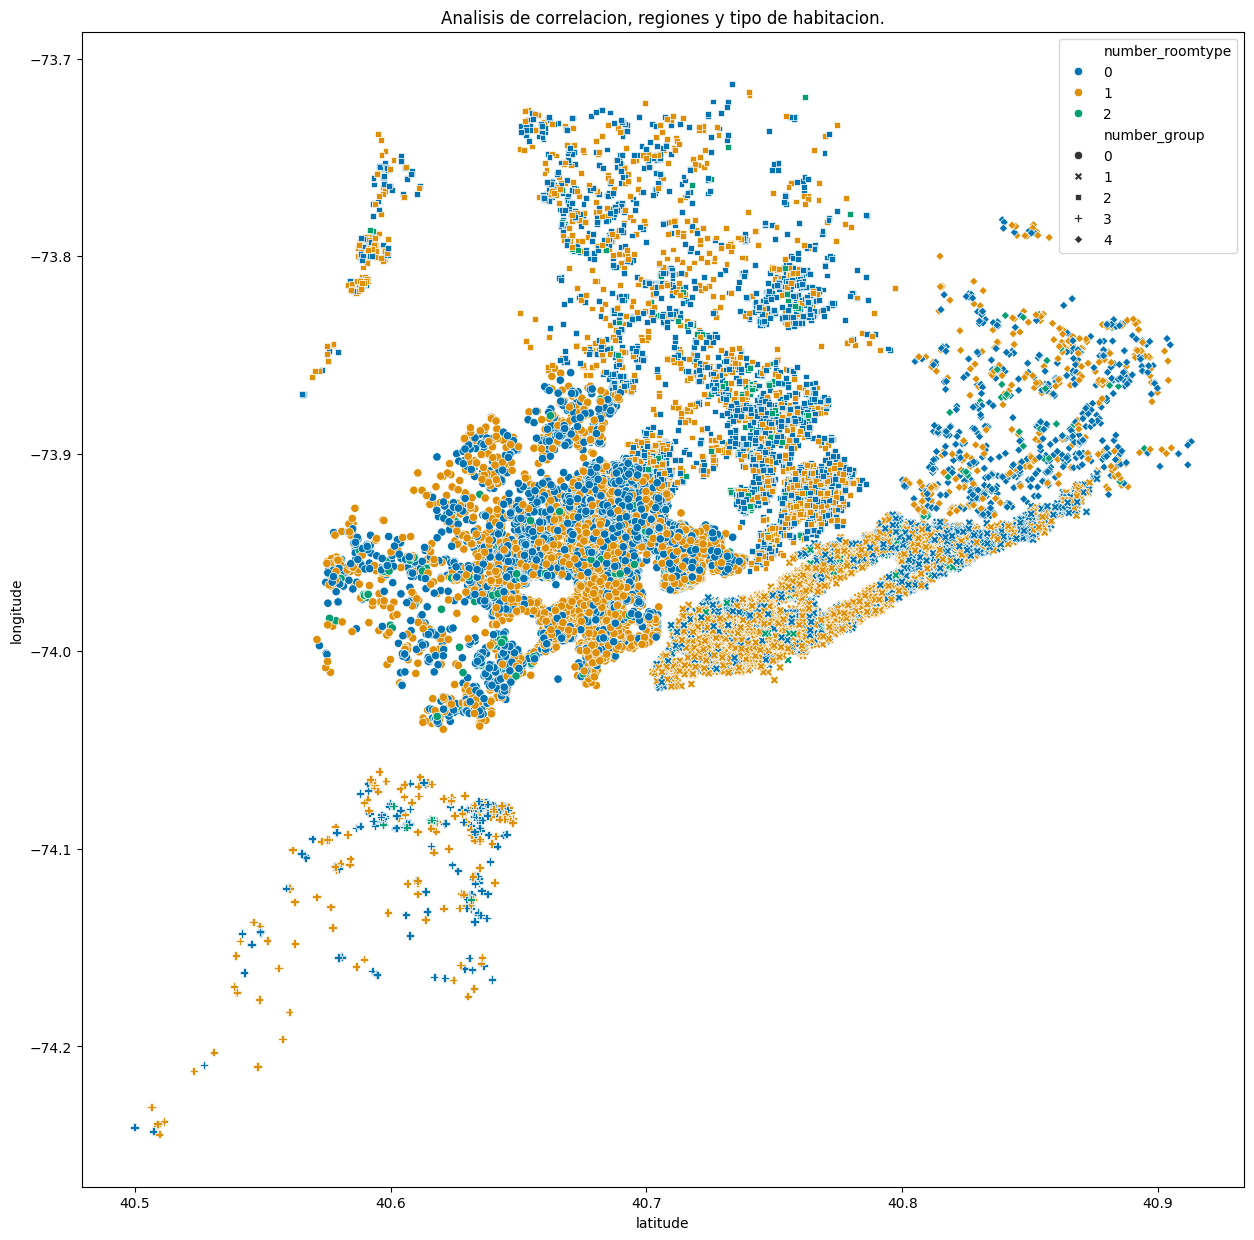

In [23]:

plt.figure(figsize=(15, 15))
sns.scatterplot(data=df_region, x='latitude', y='longitude', hue=df_region['number_roomtype'], style=df_region['number_group'], palette='colorblind')
plt.title('Analisis de correlacion, regiones y tipo de habitacion.')
plt.show()

>### Observación: 
>
>Uso las coordenadas disponibles para tener mayor visualización en el mapa, región y tipo de habitación

In [24]:
X = df_region.drop('price', axis=1)
y = df_region['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

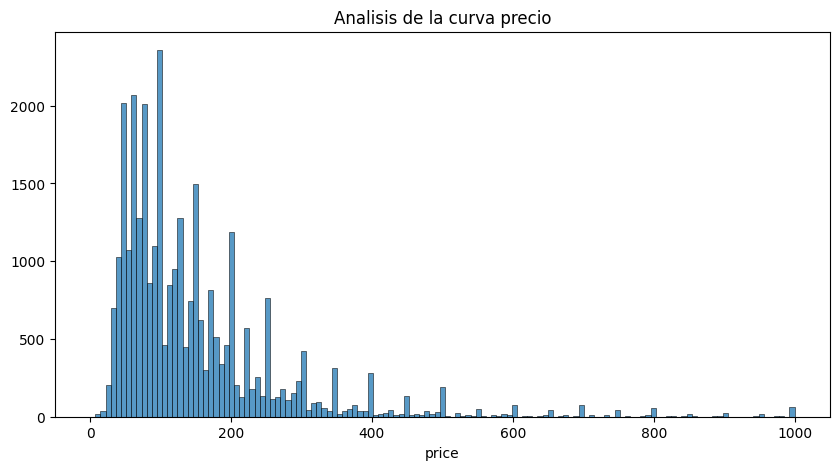

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_region, x='price', binrange=(0,1000)).set(ylabel=None)
plt.title('Analisis de la curva precio')
plt.show()

In [26]:
min_max_scaler = MinMaxScaler()  

num_variables = ['number_group','number_roomtype','minimum_nights','price','availability_365','number_of_reviews']
min_max_features = min_max_scaler.fit_transform(df_region[num_variables])

df_min_max = pd.DataFrame(min_max_features,index=df.index, columns=num_variables)

df_min_max

,number_group,number_roomtype,minimum_nights,price,availability_365,number_of_reviews
0,0.00,0.0,0.000000,0.013914,1.000000,0.014308
1,0.25,0.5,0.000000,0.021522,0.972527,0.071542
2,0.25,0.0,0.001601,0.014014,1.000000,0.000000
3,0.00,0.5,0.000000,0.007908,0.530220,0.429253
5,0.25,0.5,0.001601,0.019019,0.351648,0.117647
...,...,...,...,...,...,...
48890,0.00,0.0,0.000801,0.006006,0.021978,0.000000
48891,0.00,0.0,0.002402,0.003003,0.096154,0.000000
48892,0.25,0.5,0.007206,0.010511,0.071429,0.000000
48893,0.25,1.0,0.000000,0.004505,0.002747,0.000000


>### Observación: 
>
>
>Hay varios valores anormales en la gráfica target, ya teniendo mis variables categóricas en numéricas, procedemos a transformar nuestros >datos en relación 0 a 1 para utilizarlo en nuestro modelo.